In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [2]:
uri = "https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv"

In [3]:
df = pd.read_csv(uri).drop(columns=['rowid'])

## Data related to the Adelie penguin species

In [4]:
dados_adelie = df.query("species == 'Adelie'").dropna()
dados_adelie['idade'] = datetime.now().year - dados_adelie.year
dados_adelie.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,idade
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,16
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,16
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,16


## Scatter plot between sex's of Adelie specie

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

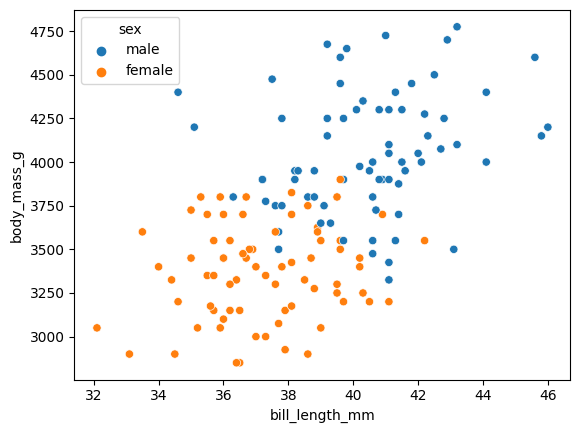

In [5]:
sns.scatterplot(data=dados_adelie, x = "bill_length_mm", y = "body_mass_g", hue='sex')

## Scatter plot with linear regression between sex's of Adelie specie

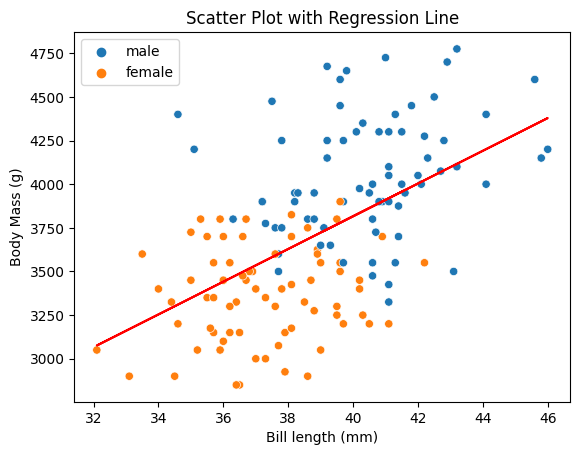

In [14]:
x = dados_adelie['bill_length_mm']
y = dados_adelie['body_mass_g']

sns.scatterplot(data=dados_adelie, x = "bill_length_mm", y = "body_mass_g", hue='sex')

slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a linear regression line
line = slope * x + intercept

# Plot the linear regression line
plt.plot(x, line, 'r')

plt.xlabel("Bill length (mm)")
plt.ylabel("Body Mass (g)")
# Set the chart title
plt.title('Scatter Plot with Regression Line')


plt.legend()
# Show graph
plt.show()

### we can see a positive correlation between bill_length_mm and body_mass_g (Adelie specie)

## Scatter plot with linear regression between species of Penguins

##### (I know I could have used lmplot in the previous case, but I think it would look a little "ugly")

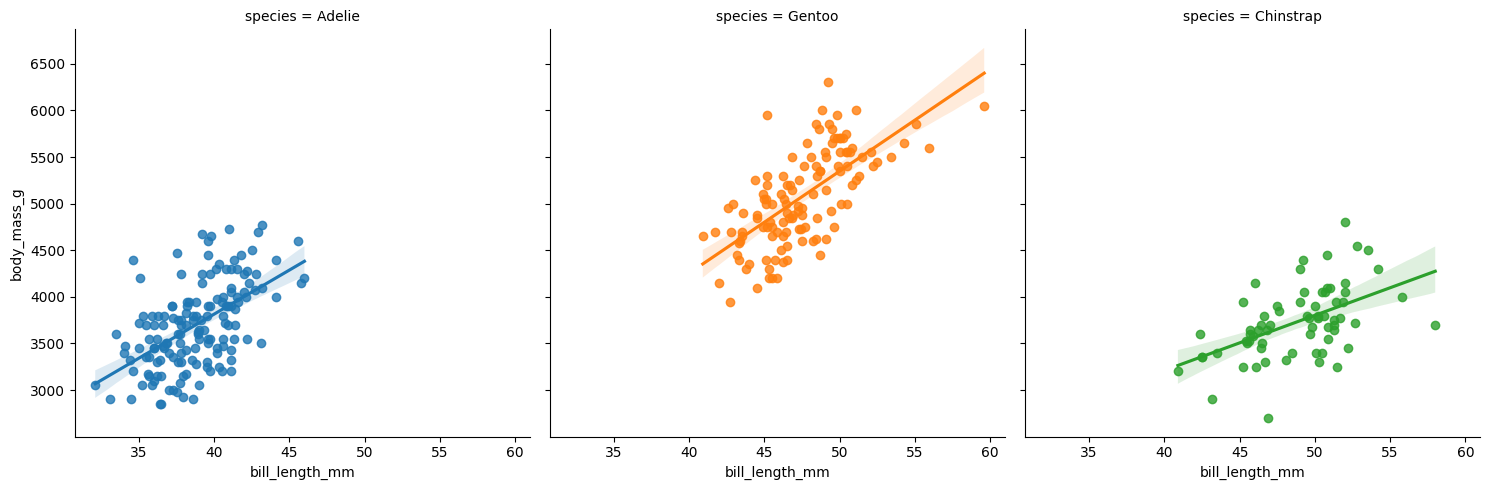

In [17]:
sns.lmplot(data=df, x='bill_length_mm', y='body_mass_g', hue='species', col='species')

### we can see a positive correlation between bill_length_mm and body_mass_g across all species

## we can see a positive correlation between bill_length_mm and body_mass_g in all sexes with large outliers in the female species

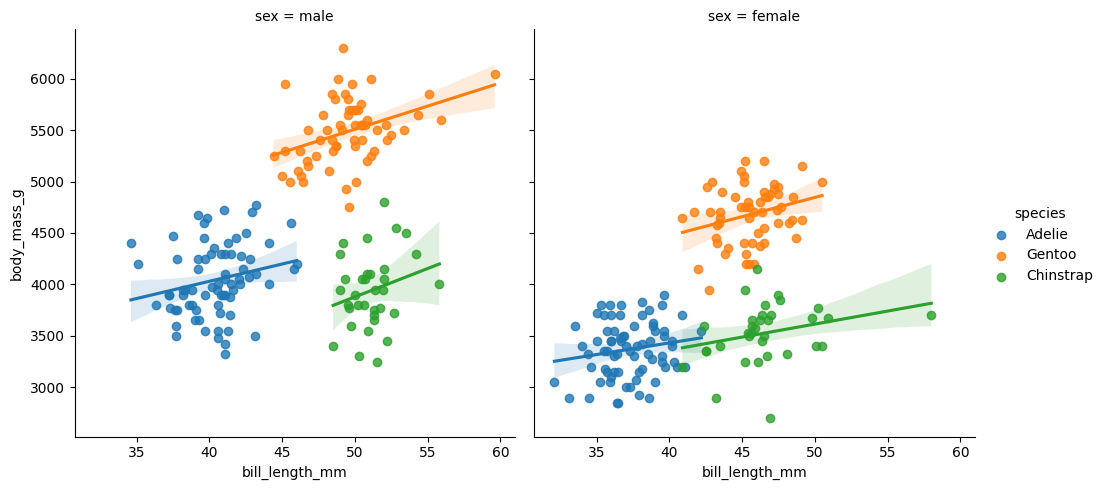

In [18]:
sns.lmplot(data=df, x='bill_length_mm', y='body_mass_g', hue='species', col='sex')

## Scatter plot with linear regression between Penguin species and their sex

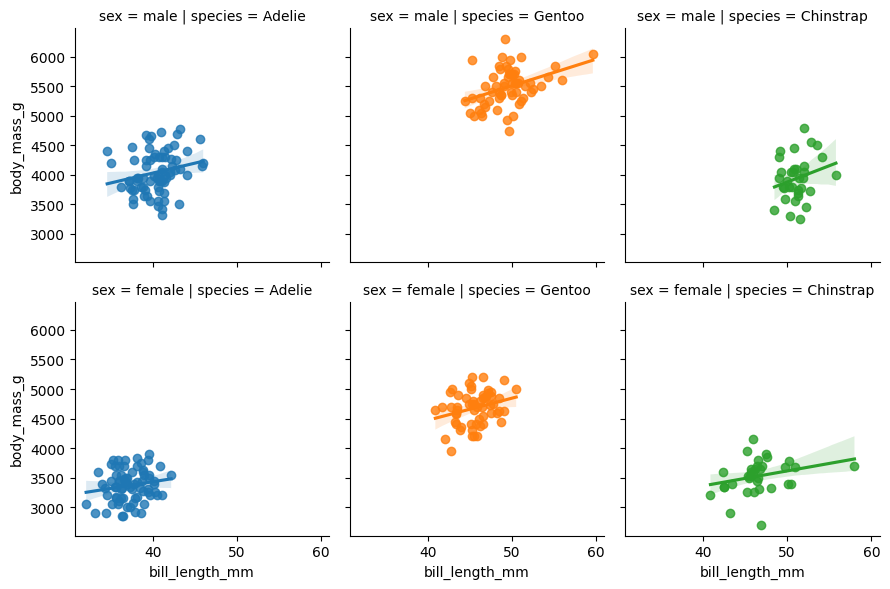

In [19]:
sns.lmplot(data=df, 
           x='bill_length_mm', 
           y='body_mass_g', 
           hue='species', 
           col='species', row='sex', height=3)

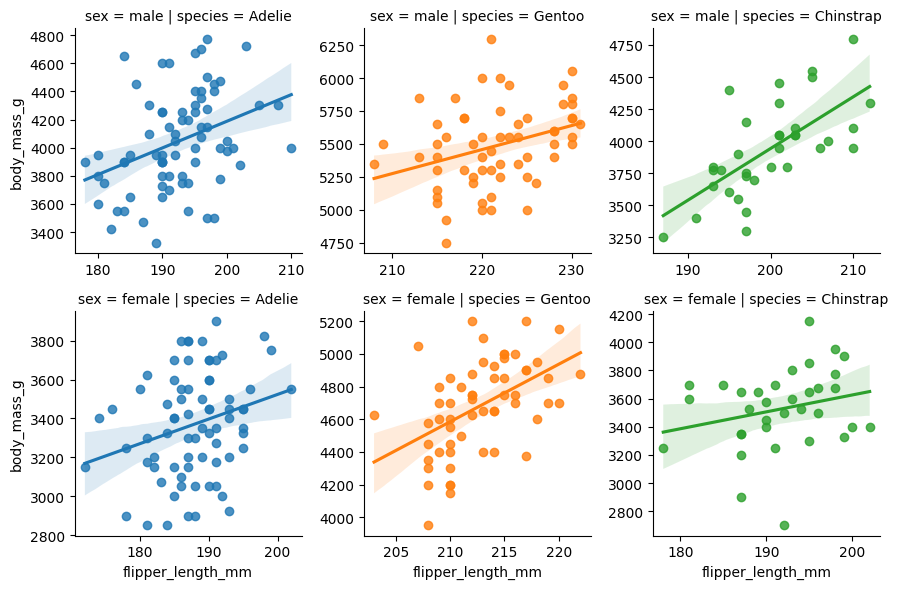

In [20]:
sns.lmplot(data=df, 
           x='flipper_length_mm', 
           y='body_mass_g', 
           hue='species', 
           col='species', row='sex', height=3,
          facet_kws=dict(sharex=False, sharey=False),)